In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Housing.csv")

In [3]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


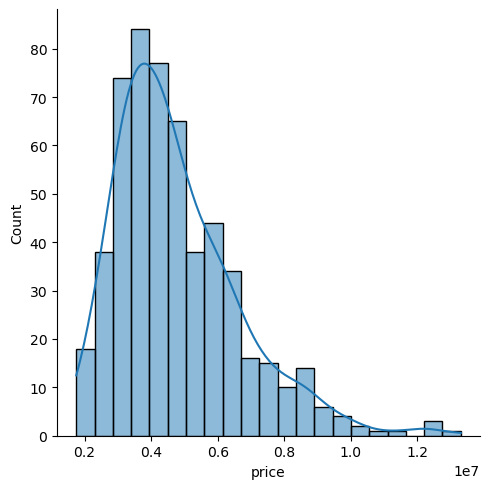

In [4]:
sns.displot(df["price"], kde=True)

In [5]:
df = df.drop("furnishingstatus", axis=1)

In [6]:
len(df)

545

In [7]:
df = df.iloc[5:]
df = df.reset_index(drop=True)

In [8]:
len(df)

540

In [9]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
0,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes
1,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes
2,10150000,16200,5,3,2,yes,no,no,no,no,0,no
3,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes
4,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes


In [10]:
main = df.iloc[:,5:6].values
guest = df.iloc[:,6:7].values
basement = df.iloc[:,7:8].values
hot = df.iloc[:,8:9].values
air = df.iloc[:,9:10].values
pref = df.iloc[:,11:12].values

In [11]:
from sklearn import preprocessing

In [12]:
le = preprocessing.LabelEncoder()

In [13]:
main[:,0] = le.fit_transform(df.iloc[:,5])
guest[:,0] = le.fit_transform(df.iloc[:,6])
basement[:,0] = le.fit_transform(df.iloc[:,7])
hot[:,0] = le.fit_transform(df.iloc[:,8])
air[:,0] = le.fit_transform(df.iloc[:,9])
pref[:,0] = le.fit_transform(df.iloc[:,11])

In [14]:
pref

array([[1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
    

In [15]:
ohe = preprocessing.OneHotEncoder()

In [16]:
main = ohe.fit_transform(main).toarray()
guest = ohe.fit_transform(guest).toarray()
basement = ohe.fit_transform(basement).toarray()
hot = ohe.fit_transform(hot).toarray()
air = ohe.fit_transform(air).toarray()
pref = ohe.fit_transform(pref).toarray()

In [17]:
pref

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [18]:
newdf = pd.DataFrame(data=main,columns=["m_yes","m_no"])
newdf2 = pd.DataFrame(data=guest,columns=["g_yes","g_no"])
newdf3 = pd.DataFrame(data=basement,columns=["b_yes","b_no"])
newdf4 = pd.DataFrame(data=hot,columns=["h_yes","h_no"])
newdf5 = pd.DataFrame(data=air,columns=["a_yes","a_no"])
newdf6 = pd.DataFrame(data=pref,columns=["p_yes","p_no"])

In [19]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea'],
      dtype='object')

In [20]:
df = df.drop(["mainroad","guestroom","basement","hotwaterheating","airconditioning","prefarea"],axis=1)

In [21]:
df.head()

,price,area,bedrooms,bathrooms,stories,parking
0,10850000,7500,3,3,1,2
1,10150000,8580,4,3,4,2
2,10150000,16200,5,3,2,0
3,9870000,8100,4,1,2,2
4,9800000,5750,3,2,4,1


In [22]:
df = pd.concat([df,newdf,newdf2,newdf3,newdf4,newdf5,newdf6], axis=1)

In [23]:
df.head()

,price,area,bedrooms,bathrooms,stories,parking,m_yes,m_no,g_yes,g_no,b_yes,b_no,h_yes,h_no,a_yes,a_no,p_yes,p_no
0,10850000,7500,3,3,1,2,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
1,10150000,8580,4,3,4,2,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
2,10150000,16200,5,3,2,0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,9870000,8100,4,1,2,2,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
4,9800000,5750,3,2,4,1,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


In [24]:
y = df["price"].values
x = df.drop("price", axis=1).values

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=19)

In [27]:
from sklearn.preprocessing import MinMaxScaler

In [28]:
scaler = MinMaxScaler()

In [29]:
x_train = scaler.fit_transform(x_train)

In [30]:
x_test = scaler.transform(x_test)

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [32]:
x_train.shape

(378, 17)

In [82]:
model = Sequential()

model.add(Dense(units=17, activation="relu"))
model.add(Dense(units=9, activation="relu"))
model.add(Dense(units=9, activation="relu"))
model.add(Dense(units=9, activation="relu"))
model.add(Dense(units=9, activation="relu"))
model.add(Dense(units=9, activation="relu"))
model.add(Dense(units=9, activation="relu"))
model.add(Dense(units=1))

model.compile(loss="mse", optimizer="adam")

In [83]:
earlystopping = EarlyStopping(monitor="val_loss", mode="min", patience=25)

In [84]:
model.fit(x=x_train, y=y_train, epochs=700, validation_data=(x_test,y_test), callbacks=[earlystopping])

Epoch 1/700
12/12 [==============================] - 1s 37ms/step - loss: 24390460768256.0000 - val_loss: 26608240951296.0000
Epoch 2/700
12/12 [==============================] - 0s 9ms/step - loss: 24390462865408.0000 - val_loss: 26608240951296.0000
Epoch 3/700
12/12 [==============================] - 0s 8ms/step - loss: 24390456573952.0000 - val_loss: 26608240951296.0000
Epoch 4/700
12/12 [==============================] - 0s 9ms/step - loss: 24390460768256.0000 - val_loss: 26608240951296.0000
Epoch 5/700
12/12 [==============================] - 0s 8ms/step - loss: 24390456573952.0000 - val_loss: 26608240951296.0000
Epoch 6/700
12/12 [==============================] - 0s 9ms/step - loss: 24390460768256.0000 - val_loss: 26608236756992.0000
Epoch 7/700
12/12 [==============================] - 0s 8ms/step - loss: 24390454476800.0000 - val_loss: 26608236756992.0000
Epoch 8/700
12/12 [==============================] - 0s 8ms/step - loss: 24390456573952.0000 - val_loss: 26608230465536.0000

12/12 [==============================] - 0s 8ms/step - loss: 1744328720384.0000 - val_loss: 1757765042176.0000
Epoch 67/700
12/12 [==============================] - 0s 9ms/step - loss: 1728513441792.0000 - val_loss: 1738406494208.0000
Epoch 68/700
12/12 [==============================] - 0s 8ms/step - loss: 1714056724480.0000 - val_loss: 1721309593600.0000
Epoch 69/700
12/12 [==============================] - 0s 9ms/step - loss: 1697895153664.0000 - val_loss: 1712243343360.0000
Epoch 70/700
12/12 [==============================] - 0s 8ms/step - loss: 1683649069056.0000 - val_loss: 1706271703040.0000
Epoch 71/700
12/12 [==============================] - 0s 8ms/step - loss: 1669653594112.0000 - val_loss: 1691659927552.0000
Epoch 72/700
12/12 [==============================] - 0s 8ms/step - loss: 1655815012352.0000 - val_loss: 1677824753664.0000
Epoch 73/700
12/12 [==============================] - 0s 8ms/step - loss: 1643222794240.0000 - val_loss: 1664298385408.0000
Epoch 74/700
12/12 [=

Epoch 132/700
12/12 [==============================] - 0s 8ms/step - loss: 1207469080576.0000 - val_loss: 1232803594240.0000
Epoch 133/700
12/12 [==============================] - 0s 9ms/step - loss: 1208244109312.0000 - val_loss: 1246003462144.0000
Epoch 134/700
12/12 [==============================] - 0s 8ms/step - loss: 1205242560512.0000 - val_loss: 1221972197376.0000
Epoch 135/700
12/12 [==============================] - 0s 8ms/step - loss: 1199047704576.0000 - val_loss: 1237528870912.0000
Epoch 136/700
12/12 [==============================] - 0s 9ms/step - loss: 1194109698048.0000 - val_loss: 1234302926848.0000
Epoch 137/700
12/12 [==============================] - 0s 8ms/step - loss: 1193635086336.0000 - val_loss: 1221986091008.0000
Epoch 138/700
12/12 [==============================] - 0s 8ms/step - loss: 1189531615232.0000 - val_loss: 1221090476032.0000
Epoch 139/700
12/12 [==============================] - 0s 9ms/step - loss: 1186154545152.0000 - val_loss: 1218254864384.0000


12/12 [==============================] - 0s 8ms/step - loss: 1100996411392.0000 - val_loss: 1097183526912.0000
Epoch 198/700
12/12 [==============================] - 0s 8ms/step - loss: 1101594099712.0000 - val_loss: 1106249383936.0000
Epoch 199/700
12/12 [==============================] - 0s 9ms/step - loss: 1100824576000.0000 - val_loss: 1096381825024.0000
Epoch 200/700
12/12 [==============================] - 0s 8ms/step - loss: 1098236887040.0000 - val_loss: 1100527435776.0000
Epoch 201/700
12/12 [==============================] - 0s 8ms/step - loss: 1099492556800.0000 - val_loss: 1097409626112.0000
Epoch 202/700
12/12 [==============================] - 0s 9ms/step - loss: 1097109929984.0000 - val_loss: 1106033246208.0000
Epoch 203/700
12/12 [==============================] - 0s 8ms/step - loss: 1096634466304.0000 - val_loss: 1107844661248.0000
Epoch 204/700
12/12 [==============================] - 0s 8ms/step - loss: 1095770636288.0000 - val_loss: 1095473102848.0000
Epoch 205/700


12/12 [==============================] - 0s 8ms/step - loss: 1061089378304.0000 - val_loss: 1041645174784.0000
Epoch 263/700
12/12 [==============================] - 0s 9ms/step - loss: 1060334600192.0000 - val_loss: 1028137746432.0000
Epoch 264/700
12/12 [==============================] - 0s 8ms/step - loss: 1059113926656.0000 - val_loss: 1035239030784.0000
Epoch 265/700
12/12 [==============================] - 0s 8ms/step - loss: 1060091985920.0000 - val_loss: 1033817423872.0000
Epoch 266/700
12/12 [==============================] - 0s 7ms/step - loss: 1058337652736.0000 - val_loss: 1041857970176.0000
Epoch 267/700
12/12 [==============================] - 0s 8ms/step - loss: 1058579939328.0000 - val_loss: 1044600913920.0000
Epoch 268/700
12/12 [==============================] - 0s 8ms/step - loss: 1058438709248.0000 - val_loss: 1035834818560.0000
Epoch 269/700
12/12 [==============================] - 0s 8ms/step - loss: 1056500154368.0000 - val_loss: 1032112504832.0000
Epoch 270/700


12/12 [==============================] - 0s 9ms/step - loss: 1035527651328.0000 - val_loss: 1003423006720.0000
Epoch 328/700
12/12 [==============================] - 0s 8ms/step - loss: 1035456544768.0000 - val_loss: 996988682240.0000
Epoch 329/700
12/12 [==============================] - 0s 8ms/step - loss: 1035291262976.0000 - val_loss: 1000735047680.0000
Epoch 330/700
12/12 [==============================] - 0s 9ms/step - loss: 1033869852672.0000 - val_loss: 1003256479744.0000
Epoch 331/700
12/12 [==============================] - 0s 8ms/step - loss: 1034495655936.0000 - val_loss: 1001727590400.0000
Epoch 332/700
12/12 [==============================] - 0s 8ms/step - loss: 1034318381056.0000 - val_loss: 998128287744.0000
Epoch 333/700
12/12 [==============================] - 0s 9ms/step - loss: 1033070903296.0000 - val_loss: 1002127949824.0000
Epoch 334/700
12/12 [==============================] - 0s 8ms/step - loss: 1033007333376.0000 - val_loss: 1002768891904.0000
Epoch 335/700
12

12/12 [==============================] - 0s 9ms/step - loss: 1017407995904.0000 - val_loss: 979943227392.0000
Epoch 394/700
12/12 [==============================] - 0s 8ms/step - loss: 1018015186944.0000 - val_loss: 973155663872.0000
Epoch 395/700
12/12 [==============================] - 0s 8ms/step - loss: 1017950830592.0000 - val_loss: 978032459776.0000
Epoch 396/700
12/12 [==============================] - 0s 9ms/step - loss: 1016815222784.0000 - val_loss: 984842567680.0000
Epoch 397/700
12/12 [==============================] - 0s 8ms/step - loss: 1022482186240.0000 - val_loss: 995403694080.0000
Epoch 398/700
12/12 [==============================] - 0s 8ms/step - loss: 1018473086976.0000 - val_loss: 974818902016.0000
Epoch 399/700
12/12 [==============================] - 0s 9ms/step - loss: 1017595494400.0000 - val_loss: 984047026176.0000
Epoch 400/700
12/12 [==============================] - 0s 8ms/step - loss: 1018713276416.0000 - val_loss: 990503108608.0000
Epoch 401/700
12/12 [=

12/12 [==============================] - 0s 9ms/step - loss: 1006038286336.0000 - val_loss: 980577550336.0000
Epoch 460/700
12/12 [==============================] - 0s 8ms/step - loss: 1009258397696.0000 - val_loss: 990882562048.0000
Epoch 461/700
12/12 [==============================] - 0s 8ms/step - loss: 1005490536448.0000 - val_loss: 969873031168.0000
Epoch 462/700
12/12 [==============================] - 0s 9ms/step - loss: 1006988623872.0000 - val_loss: 971245879296.0000
Epoch 463/700
12/12 [==============================] - 0s 8ms/step - loss: 1005166788608.0000 - val_loss: 968869412864.0000
Epoch 464/700
12/12 [==============================] - 0s 8ms/step - loss: 1007361130496.0000 - val_loss: 979118194688.0000
Epoch 465/700
12/12 [==============================] - 0s 9ms/step - loss: 1006530592768.0000 - val_loss: 966158123008.0000
Epoch 466/700
12/12 [==============================] - 0s 8ms/step - loss: 1006700527616.0000 - val_loss: 975330934784.0000
Epoch 467/700
12/12 [=

12/12 [==============================] - 0s 9ms/step - loss: 998256934912.0000 - val_loss: 974671839232.0000
Epoch 526/700
12/12 [==============================] - 0s 8ms/step - loss: 998350520320.0000 - val_loss: 966862438400.0000


In [85]:
kayip = pd.DataFrame(model.history.history)

<Axes: >

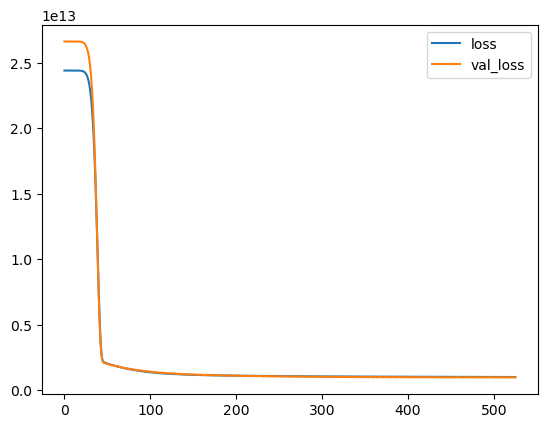

In [86]:
kayip.plot()

In [87]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [88]:
tahminx = model.predict(x_test)

6/6 [==============================] - 0s 5ms/step


In [89]:
mean_absolute_error(y_test,tahminx)

745249.2561728396